<img src="https://i.imgur.com/6U6q5jQ.png"/>





<a target="_blank" href="https://colab.research.google.com/github/SocialAnalytics-StrategicIntelligence/introGraph/blob/main/index.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Graphs

Let me show you a graph (from [wikipedia](https://en.wikipedia.org/wiki/Graph_(discrete_mathematics))):

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/6n-graf.svg/440px-6n-graf.svg.png"/>

As you can see, it is simply a representation of two sets:

1. A set of **vertices** or **nodes**. In the image above you see the nodes _1_, _2_, _3_, _4_, _5_, and _6_.
2. A set of **edges** or **links**. In the image above, the links are connecting pairs of nodes. 

Altogether, a _graph_ reveals some _relationship_ among the _nodes_. The graph structure will allow us to explore and understand that relationship. 

## Creating Graphs

The graph above can be represented computationally in Python using **networkx**:

In [1]:
import networkx as nx

# create graph
G = nx.Graph()

# create nodes and edges
G.add_edges_from([(1, 2), (1, 5),(2,5),(2,3),(3,4),(4,5),(4,6)])

## Basic Elements

**G** is the graph:

In [2]:
#you don't see much...just what it is:
G

In [3]:
# You see nodes
G.nodes.data()

NodeDataView({1: {}, 2: {}, 5: {}, 3: {}, 4: {}, 6: {}})

In [4]:
# You see node ids
G.nodes()

NodeView((1, 2, 5, 3, 4, 6))

In [5]:
# similar
G.nodes().values()

ValuesView(NodeView((1, 2, 5, 3, 4, 6)))

In [6]:
# You see edges
G.edges()

EdgeView([(1, 2), (1, 5), (2, 5), (2, 3), (5, 4), (3, 4), (4, 6)])

In [7]:
# You see edges items
G.edges().items()

ItemsView(EdgeView([(1, 2), (1, 5), (2, 5), (2, 3), (5, 4), (3, 4), (4, 6)]))

## Drawing

As you can see, the graph is created by adding pairs of nodes. Once you complete that stage, you can draw the graph:

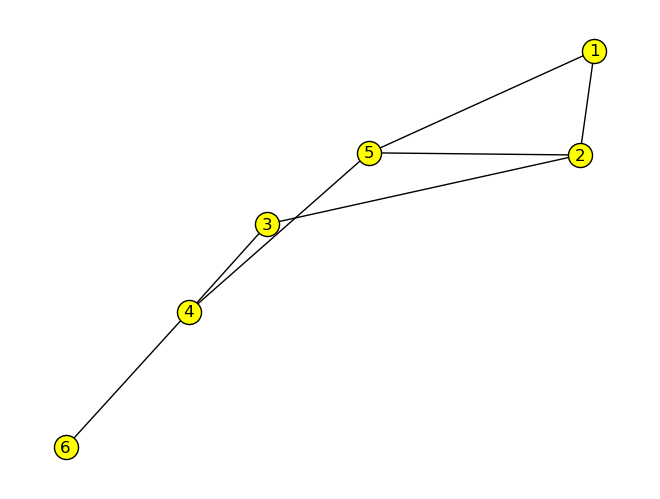

In [8]:
# draw
nx.draw(G=G,
        with_labels=True,
        node_color='yellow',
        edgecolors='black')

Notice that the position of the nodes will vary every time you re draw the graph. In fact, drawing a graph can become a challenge by itself when we need to find information via visualization. 


## Interaction with Pyvis

Pyvis uses color, size, label and title attributes.

In [9]:
# dict of labels
labels={i:str(i) for i in G.nodes()}
labels # string as label

{1: '1', 2: '2', 5: '5', 3: '3', 4: '4', 6: '6'}

In [10]:
nx.set_node_attributes(G,labels,'label') # values according to id
nx.set_node_attributes(G,'red','color') # for all
G.nodes.data()

NodeDataView({1: {'label': '1', 'color': 'red'}, 2: {'label': '2', 'color': 'red'}, 5: {'label': '5', 'color': 'red'}, 3: {'label': '3', 'color': 'red'}, 4: {'label': '4', 'color': 'red'}, 6: {'label': '6', 'color': 'red'}})

In [11]:
from pyvis.network import Network

Gvis = Network('500px', '500px',notebook=True,cdn_resources='remote')
Gvis.from_nx(G.copy()) # create a copy!
Gvis.show('Gvis.html')



### Edge directionality

The graph we created and drew represented an **undirected** graph, that is, the relationships between a pair of nodes are **symmetric**: the relationships can not represent direction because they are _inherently mutual_ between the nodes. For example, the relationship *to be a neighbor of* is symmetric.

The following graph is **directed** (also from wikipedia):

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/23/Directed_graph_no_background.svg/340px-Directed_graph_no_background.svg.png"/>


You can create this directed graph this way:

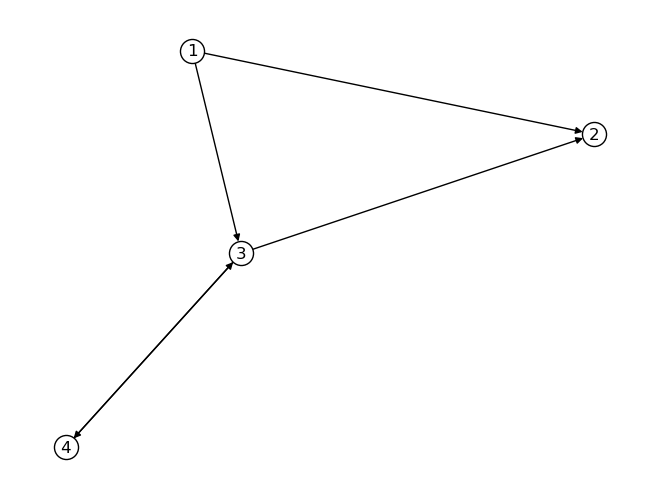

In [12]:
# create graph
dG = nx.DiGraph()

# create nodes and edges
dG.add_edges_from([(1, 2), (1, 3),(3,2),(3,4),(4,3)])

# drawing
nx.draw(dG,with_labels=True,node_color='white',edgecolors='black')

Directed links are also called **arcs**. Notice the _DiGraph_ created represents an **asymmetric** relationship: the relationship a node has with another node does not need to be mutual, but could be (see nodes _3_ and _4_). If the arcs represent **cares for someone**, it shows that the feeling is not reciprocal for most cases in this graph. If a relationship is not mutual, and can only be in one direction, it is called **anti symmetric**.

## Attributes

Nodes can have attributes:

In [13]:
# adding attributes
dG.nodes[1]["sex"]='male'
dG.nodes[2]["sex"]='male'
dG.nodes[3]["sex"]='female'
dG.nodes[4]["sex"]='female'

In [14]:
# seeing attributes
nx.get_node_attributes(dG, "sex")

{1: 'male', 2: 'male', 3: 'female', 4: 'female'}

Set the color of the node based on sex:

In [15]:
#if 
nx.get_node_attributes(dG, "sex").items()

dict_items([(1, 'male'), (2, 'male'), (3, 'female'), (4, 'female')])

In [16]:
# then
{i:'red' if v=='female' else 'blue' for i,v in nx.get_node_attributes(dG, "sex").items()}

{1: 'blue', 2: 'blue', 3: 'red', 4: 'red'}

In [17]:
# so...
colors={i:'red' if v=='female' else 'blue' for i,v in nx.get_node_attributes(dG, "sex").items()}

# set color
nx.set_node_attributes(dG, colors, "color")
dG.nodes.data()

NodeDataView({1: {'sex': 'male', 'color': 'blue'}, 2: {'sex': 'male', 'color': 'blue'}, 3: {'sex': 'female', 'color': 'red'}, 4: {'sex': 'female', 'color': 'red'}})

In [18]:
# since
nx.get_node_attributes(dG, "color").values()

dict_values(['blue', 'blue', 'red', 'red'])

Attributes can serve for some computational purposes, but also help to visually find structures.

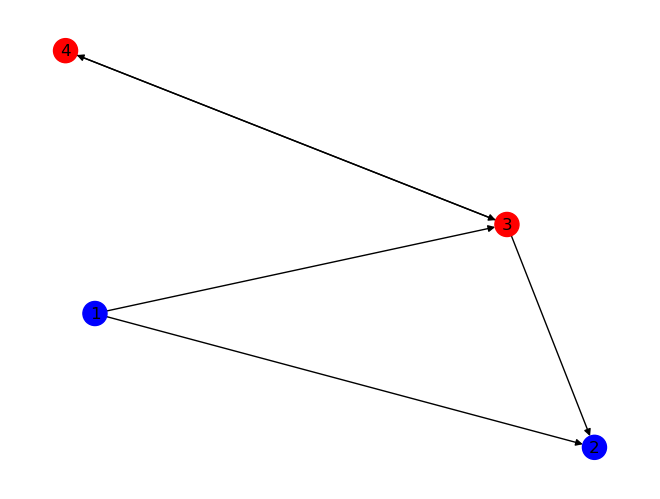

In [19]:
# using node attributes

nx.draw(dG,
        with_labels=True,
        node_color=nx.get_node_attributes(dG, "color").values())

Of course, edges can have attributes too:

In [20]:
dG.edges[(1, 2)]['weight']=1
dG.edges[(1, 3)]['weight']=3
dG.edges[(3, 2)]['weight']=5
dG.edges[(3, 4)]['weight']=10
dG.edges[(4, 3)]['weight']=0.5

In [21]:
# see them
dG.edges.data()

OutEdgeDataView([(1, 2, {'weight': 1}), (1, 3, {'weight': 3}), (3, 2, {'weight': 5}), (3, 4, {'weight': 10}), (4, 3, {'weight': 0.5})])

Let me add another attribute conditional on another attribute:

In [22]:
# if
{i:'magenta' if v<1 else 'grey' for i,v in nx.get_edge_attributes(dG, "weight").items()}

{(1, 2): 'grey',
 (1, 3): 'grey',
 (3, 2): 'grey',
 (3, 4): 'grey',
 (4, 3): 'magenta'}

In [23]:
# then
colorEdges={i:'magenta' if v<1 else 'grey' for i,v in nx.get_edge_attributes(dG, "weight").items()}
nx.set_edge_attributes(dG,values=colorEdges,name='color')

In [24]:
# see edges and attributes
dG.edges.data()

OutEdgeDataView([(1, 2, {'weight': 1, 'color': 'grey'}), (1, 3, {'weight': 3, 'color': 'grey'}), (3, 2, {'weight': 5, 'color': 'grey'}), (3, 4, {'weight': 10, 'color': 'grey'}), (4, 3, {'weight': 0.5, 'color': 'magenta'})])

Let's use edge attributes:

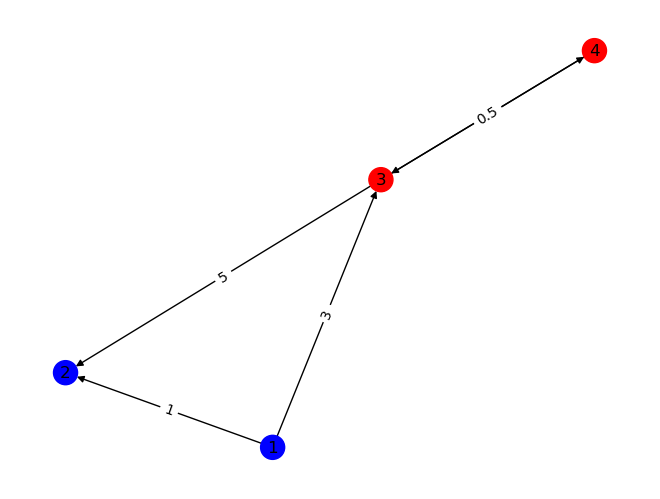

In [25]:
# use the edge attributes
# add labels to edges
            
pos = nx.spring_layout(dG) # position of the nodes

nx.draw(dG,
        pos, # using "position"
        with_labels=True,
        node_color=nx.get_node_attributes(dG, "color").values())

# adding labels
final_dG=nx.draw_networkx_edge_labels(dG,pos,edge_labels=nx.get_edge_attributes(dG,'weight'))

The color of edges:

In [26]:
nx.get_edge_attributes(dG,'color').values()

dict_values(['grey', 'grey', 'grey', 'grey', 'magenta'])

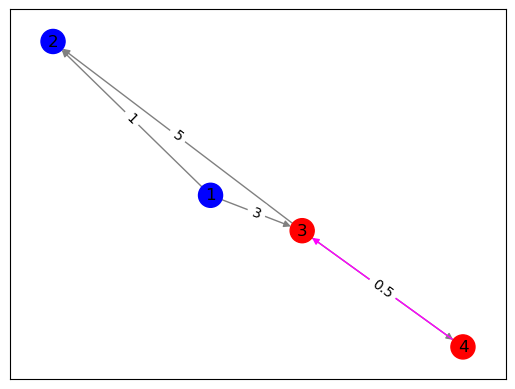

In [27]:
# use the edge attributes
# add labels to edges
# add color to edges

edge_colors=nx.get_edge_attributes(dG,'color').values()
colors_for_nodes=nx.get_node_attributes(dG,'color').values()
weight_values=nx.get_edge_attributes(dG,'weight')
pos = nx.spring_layout(dG) 

# draw nodes first
nx.draw_networkx_nodes(dG,pos,
                       node_color=colors_for_nodes)
# draw edges
nx.draw_networkx_edges(dG, pos,
                       edge_color= edge_colors)
# draw node labels
nx.draw_networkx_labels(dG, pos)

final_dG=nx.draw_networkx_edge_labels(dG,pos,
                               edge_labels=weight_values)

The interactive version needs labels, we don't have them yet:

In [28]:
dG.nodes.data()[1].keys()

dict_keys(['sex', 'color'])

In [29]:
[i[2].keys() for i in dG.edges.data()][0]

dict_keys(['weight', 'color'])

In [30]:
# id as label
labels={i:str(i) for i in dG.nodes()}
nx.set_node_attributes(dG, labels, "label")

# weight as label
labels={e:str(v) for e,v in nx.get_edge_attributes(dG, "weight").items()}
nx.set_edge_attributes(dG, labels, "label")

In [31]:
dG.edges.data()

OutEdgeDataView([(1, 2, {'weight': 1, 'color': 'grey', 'label': '1'}), (1, 3, {'weight': 3, 'color': 'grey', 'label': '3'}), (3, 2, {'weight': 5, 'color': 'grey', 'label': '5'}), (3, 4, {'weight': 10, 'color': 'grey', 'label': '10'}), (4, 3, {'weight': 0.5, 'color': 'magenta', 'label': '0.5'})])

In [32]:
dGvis = Network('500px', '500px',notebook=True,cdn_resources='remote',directed=True)
dGvis.from_nx(dG.copy())
dGvis.show('dGvis.html')

### Exporting

Network does not recommend its use for complex visualization. So, several times you may want to export your graph to be visualize in Gephi or something similar:

In [33]:
nx.write_gml(dG, "dG.gml")

# Case: Elites in Peru

The network we are going to build is based on the relationships studied in this paper:
<img src="graphdata/paper.png" width="900">


In that paper, Professor Figueroa shows this table, where 1 represents that both nodes (families) appear together at least once in a top company board. Notice the last column is an attribute:

<img src="graphdata/dataRed.png" width="900">

This is an spreadsheet, representing the information above:

<img src="graphdata/dataExcel.png" width="900">

Let's use the data from the spreadsheet to prepare our table:

In [1]:
# reading in
import pandas as pd
import os

FigueData = pd.read_excel(os.path.join("graphdata","dataFigueroa.xlsx"),
                          index_col=0) #notice!!!!!

We got this:

In [2]:
FigueData.head()

,Romero,Graña,Miro Quesada,Moreyra,Fort,De La Puente,Wiese,Onrubia,Brescia,Nicolini,...,Batievsky Spack,Matos Escalada,Galsky,Lucioni,Rodriguez Rodríguez,Custer,Ikeda,Cogorno,Arias Davila,Multinacional
Romero,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
Graña,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Miro Quesada,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Moreyra,1,0,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
Fort,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1


As intended, the family appears as the row index (not the first column of data). The family is also the column names:

In [3]:
FigueData.columns

Index(['Romero', 'Graña', 'Miro Quesada', 'Moreyra', 'Fort', 'De La Puente',
       'Wiese', 'Onrubia', 'Brescia', 'Nicolini', 'Montero', 'Picaso',
       'Bentin', 'Benavides', 'Bustamante', 'Woodman Pollit', 'Raffo',
       'Piazza', 'Berckemeyer', 'Llosa Barber', 'Beoutis Ledesma',
       'Rizo Patron', 'Montori', 'Sotomayor', 'Cilloniz', 'Ferreyros',
       'Michell', 'Wong Lu', 'Batievsky Spack', 'Matos Escalada', 'Galsky',
       'Lucioni', 'Rodriguez Rodríguez', 'Custer', 'Ikeda', 'Cogorno',
       'Arias Davila', 'Multinacional'],
      dtype='object')

The **adjacency matrix** does not need the _multinacional_ attribute column, then:

In [4]:
varsToDrop=['Multinacional']
adjacency=FigueData.drop(varsToDrop,axis=1) 

#result
adjacency

,Romero,Graña,Miro Quesada,Moreyra,Fort,De La Puente,Wiese,Onrubia,Brescia,Nicolini,...,Wong Lu,Batievsky Spack,Matos Escalada,Galsky,Lucioni,Rodriguez Rodríguez,Custer,Ikeda,Cogorno,Arias Davila
Romero,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Graña,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Miro Quesada,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Moreyra,1,0,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Fort,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
De La Puente,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Wiese,0,1,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Onrubia,1,0,0,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Brescia,1,0,0,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Nicolini,1,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


It is easy to turn the adjacency matrix into a graph:

In [9]:
import networkx as nx
EliteNet = nx.from_pandas_adjacency(adjacency)

Take a look at **EliteNet**:

In [10]:
# nodes:
len(EliteNet)

37

In [11]:
# edges:
EliteNet.size()

172

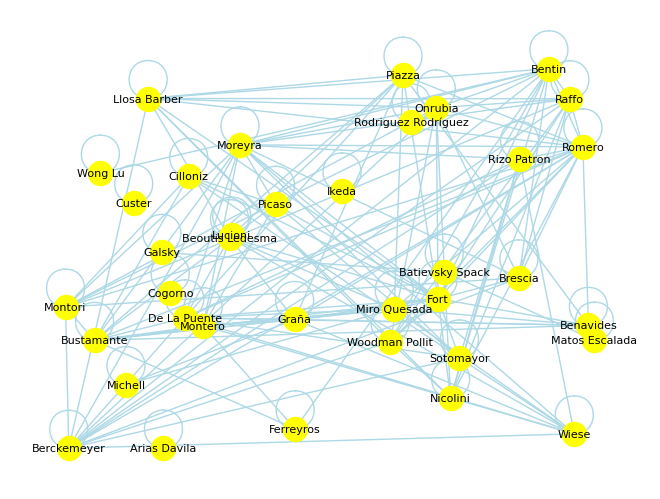

In [12]:
# plot
nx.draw_random(EliteNet,
                node_color='yellow',
                edge_color='lightblue',
                with_labels=True,
                font_size=8)

The adjacency include the self-relationships, we should take those away:

In [13]:
EliteNet.remove_edges_from(nx.selfloop_edges(EliteNet))

In [17]:
nx.to_pandas_adjacency(EliteNet).to_csv("EliteNet_adj.csv")

In [ ]:
# re plot
nx.draw_random(EliteNet,
                node_color='yellow',
                edge_color='lightblue',
                with_labels=True,
                font_size=8)

Let's add the attributes to the nodes:

In [ ]:
FigueData['Multinacional'].head()

Currently:

In [ ]:
# no attribute:
EliteNet.nodes.data()

Let me prepare a dictionary:

In [ ]:
dict(zip(FigueData.index,FigueData['Multinacional']))

Then, I can use that to add an attribute to the node:

In [ ]:
attributeToAdd=dict(zip(FigueData.index,FigueData['Multinacional']))
nx.set_node_attributes(EliteNet, attributeToAdd,'multi')

Setting color of node:

In [ ]:
colors={e:'red' if v==1 else 'green' for e,v in nx.get_node_attributes(EliteNet,"multi").items()}
nx.set_node_attributes(EliteNet, colors, "color")

# updated nodes
EliteNet.nodes.data()

In [ ]:
# using node attributes

nx.draw_random(EliteNet)

### Exercise 1 
<div class="alert-success">

1. Plot a colored version of the nodes based on attributes of the previous plot.
2. Plot using Pyvis.
3. Export the network: **nx.write_gml(EliteNet, os.path.join("graphdata","EliteNet.gml"))** 
4. Open the exported network in R and Gephi. Plot the graphs.    
</div>

# Case: Trade among countries

Let me use some information about trade among countries from the [World Bank](https://wits.worldbank.org/gptad/library.aspx):

In [ ]:
url = "https://wits.worldbank.org/gptad/library.aspx"
from IPython.display import IFrame
IFrame(url, 900,500)

I have previously pre processed the data. Let me open the file with _inforce_ agreements:

In [ ]:
tradeDF=pd.read_pickle(os.path.join("graphdata","tradeData_forGraph.pkl"))
tradeDF.info()

The _Common Name_ is the name of the agreement. All countris involved are in a list (_Memembership_list_):

In [ ]:
tradeDF.head()

Let me check the type of agreements we have in the data.

In [ ]:
tradeDF.Type.value_counts()

Let me choose the 'Framework Agreement':

In [ ]:
tradeDF.loc[tradeDF.Type=='Framework Agreement',:]

I can make a network of countries. Let me create "edges" using **Membership_list**. First, let me show you how **combinations** work:

In [ ]:
from itertools import combinations

[x for x in combinations(['chile','ecuador','peru'],2)]

In [ ]:
[x for x in combinations(['peru','ecuador','chile'],2)]

In [ ]:
[x for x in combinations(sorted(['peru','ecuador','chile']),2)]

In [ ]:
# all the pairs
list(combinations(sorted(tradeDF.loc[162,'Membership_list']), 2))

All the pairs above represent nodes and edges, then:

In [ ]:
import networkx as nx

Framework_Agreement_Net = nx.Graph(combinations(sorted(tradeDF.loc[162,'Membership_list']), 2))

In [ ]:
# see edges
Framework_Agreement_Net.edges()

In [ ]:
#draw the graph
nx.draw(Framework_Agreement_Net, with_labels=True)

Let me explore the other types:

In [ ]:
tradeDF.loc[tradeDF.Type=='Customs Union Accession Agreement',:]

In [ ]:
Accession_Agreement_Net_1973 = nx.Graph(combinations(sorted(tradeDF.loc[72,'Membership_list']), 2))
nx.draw(Accession_Agreement_Net_1973, with_labels=True)

In [ ]:
Accession_Agreement_Net_2007 = nx.Graph(combinations(sorted(tradeDF.loc[71,'Membership_list']), 2))
nx.draw(Accession_Agreement_Net_2007, with_labels=True)

Let´s see this other type, but only after the year 2000:

In [ ]:
tradeDF[(tradeDF.Type=='Regional/Plurilateral Free Trade Agreement') & (tradeDF.year_inforce_ok>2000)]

Let´s keep the countries per row:

In [ ]:
RFTA_countryLists=tradeDF[(tradeDF.Type=='Regional/Plurilateral Free Trade Agreement') & (tradeDF.year_inforce_ok>2000)]['Membership_list']
RFTA_countryLists

In [ ]:
listOfTuples=[]
for listOfMembers in RFTA_countryLists:
    for country1, country2 in combinations(sorted(listOfMembers),2):
        listOfTuples.append((country1, country2))

# see 
listOfTuples

Let's count each time a tuple happens:

In [ ]:
pd.Series(listOfTuples).value_counts().reset_index()

We can prepare a dataframe:

In [ ]:
newNames={'index':'countryTuple',	'count':'weight'}
tuplesAndWeights=pd.DataFrame(pd.Series(listOfTuples).value_counts()).reset_index(drop=False).rename(columns=newNames)
tuplesAndWeights

Let's create separate columns:

In [ ]:
tuplesAndWeights[['country1','country2']]=tuplesAndWeights['countryTuple'].to_list()
tuplesAndWeights

In [ ]:
RFTA_net=nx.from_pandas_edgelist(tuplesAndWeights, source='country1',target='country2',edge_attr=["weight"])

In [ ]:
RFTA_net.edges.data()

In [ ]:
nx.draw(RFTA_net)

In [ ]:
len(RFTA_net.nodes()),len(RFTA_net.edges())

We are not supposed to have isolates:

In [ ]:
list(nx.isolates(RFTA_net))

There should not be self loops:

In [ ]:
nx.number_of_selfloops(RFTA_net)
# RFTA_net.remove_edges_from(nx.selfloop_edges(RFTA_net))

In [ ]:
# which are they?
nx.number_connected_components(RFTA_net)

<div class="alert alert-danger">
  <strong>CHALLENGE!</strong> <br>
* Create a network creating all the edges from the whole dataset.<br>
* Plot the network in R, Gephi and Python. Is there any issue?    
</div>